In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_california_housing


In [2]:
df = fetch_california_housing()
print(df.data.shape, df.target.shape)

(20640, 8) (20640,)


In [3]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = pd.DataFrame(df.data)
y = pd.DataFrame(df.target)

In [5]:
X.columns = df.feature_names

In [6]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
X = X.dropna()

In [8]:
y

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


<Axes: xlabel='MedInc', ylabel='0'>

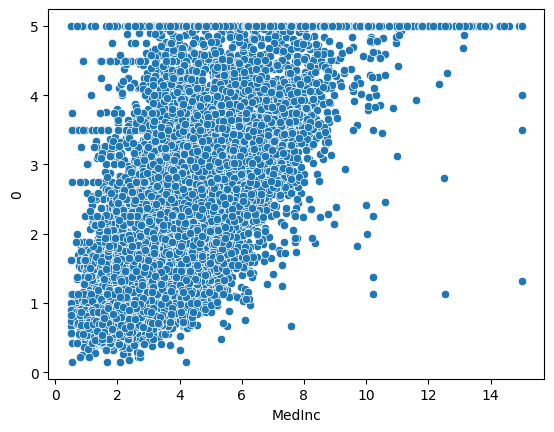

In [9]:
sns.scatterplot(x =  X["MedInc"], y = y[0])

<Axes: xlabel='HouseAge', ylabel='0'>

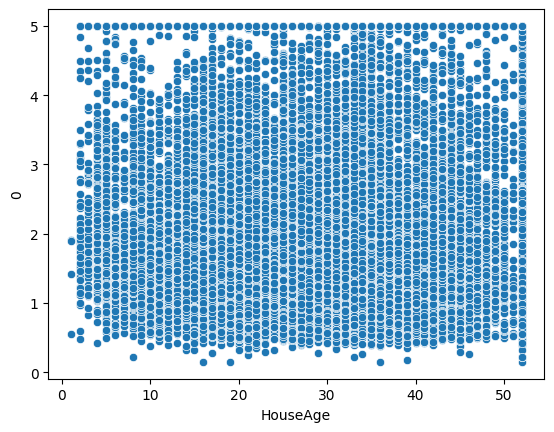

In [10]:
sns.scatterplot(x =  X["HouseAge"], y = y[0])

<Axes: xlabel='AveRooms', ylabel='0'>

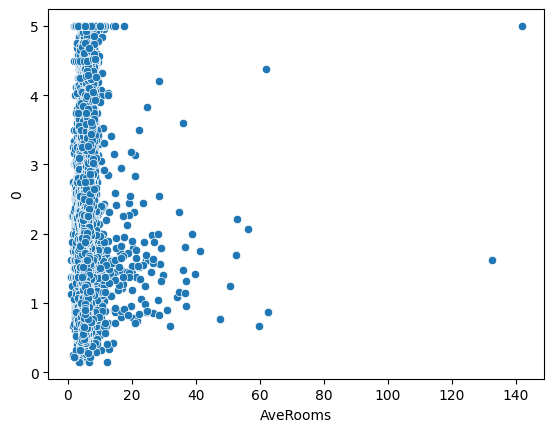

In [11]:
sns.scatterplot(x =  X["AveRooms"], y = y[0])

<Axes: xlabel='AveBedrms', ylabel='0'>

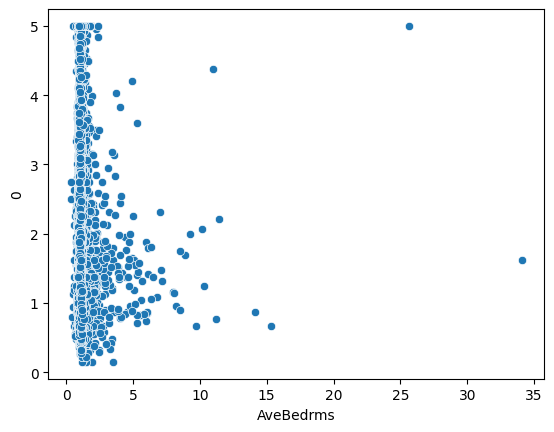

In [12]:
sns.scatterplot(x =  X["AveBedrms"], y = y[0])

<Axes: xlabel='Population', ylabel='0'>

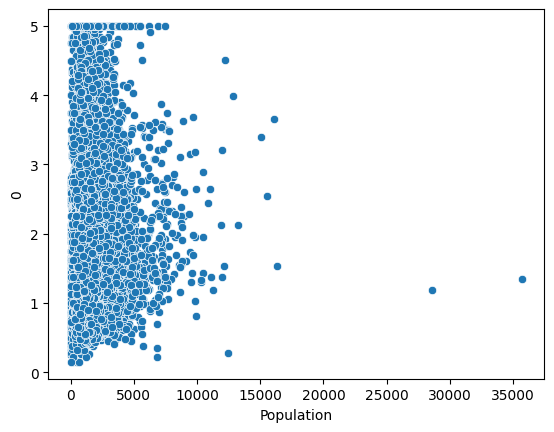

In [13]:
sns.scatterplot(x =  X["Population"], y = y[0])

<Axes: xlabel='AveOccup', ylabel='0'>

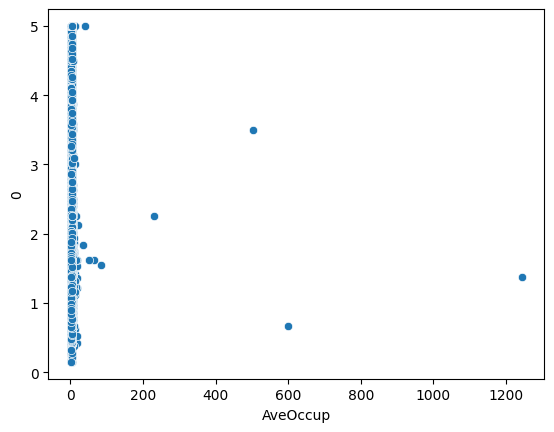

In [14]:
sns.scatterplot(x =  X["AveOccup"], y = y[0])

<Axes: xlabel='Latitude', ylabel='0'>

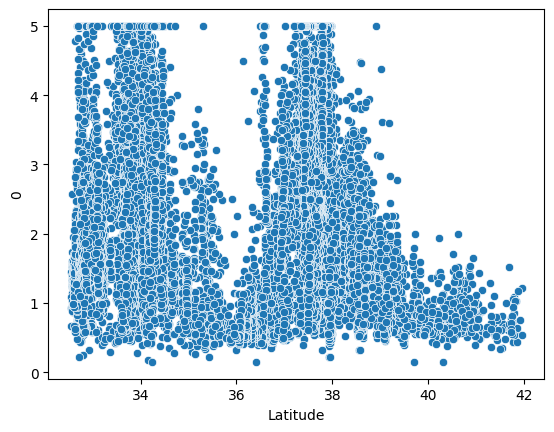

In [15]:
sns.scatterplot(x =  X["Latitude"], y = y[0])

<Axes: xlabel='Longitude', ylabel='0'>

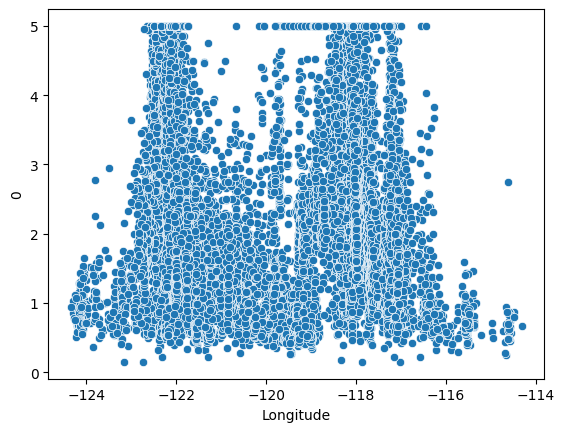

In [16]:
sns.scatterplot(x =  X["Longitude"], y = y[0])

In [17]:
encoder = LabelEncoder()
X["MedInc"]= encoder.fit_transform(X["MedInc"])
X["HouseAge"]= encoder.fit_transform(X["HouseAge"])
X["AveBedrms"]= encoder.fit_transform(X["AveBedrms"])
X["Population"]= encoder.fit_transform(X["Population"])
X["AveOccup"]= encoder.fit_transform(X["AveOccup"])
X["Latitude"]= encoder.fit_transform(X["Latitude"])
X["Longitude"]= encoder.fit_transform(X["Longitude"])


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

In [22]:
layer1 = Dense(80 , activation = 'relu')
layer2 = Dense(80 , activation = 'tanh')
layer3 = Dense(80 , activation = 'tanh')  
layer4 = Dense(80 , activation = 'relu')  
layer5 = Dense(80 , activation = 'relu')   
layer6 = Dense(1 , activation = 'linear')

In [23]:
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)

In [24]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy')

In [25]:
history = model.fit(X_train , y_train , epochs = 10 )

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: -15.3387
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: -17.1881
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: -17.3993
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: -17.2242
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -17.2535
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -17.1881
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -17.1037
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -17.0638
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -17.0643
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -17.2095


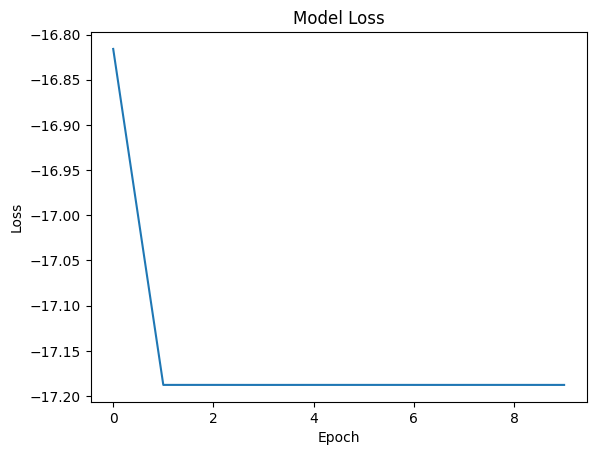

In [26]:
# prompt: create plot using history variable of model.fit

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
y_predict  = model.predict(X_test)z

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [28]:
y_predict = np.where(y_predict > 0.5 , 1 , 0)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(y_test , y_predict)

1.1138187209302326